# THE SPARKS FOUNDATION

# TASK #3

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

Dataset: https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing



# Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Loading the Dataset and analysing it

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Label Encoding Species column

In [4]:
y=df["Species"]
le=LabelEncoder()
y=le.fit_transform(y)

# Preprocessing

In [5]:
df=df.drop(columns=["Species","Id"])

In [6]:
X=df
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Determining the optimum number of clusters for Iris dataset

In [7]:
score=[]
wcss=[]
for i in range(2,20):
    km=KMeans(n_clusters=i)
    label=km.fit_predict(X)
    sc=silhouette_score(X,label)
    score.append(sc)
    wcss.append(km.inertia_)

# Within cluster sum of squares for various number of clusters

In [8]:
print(wcss)

[152.36870647733906, 78.94084142614602, 57.31787321428571, 46.56163015873016, 38.949434844543546, 34.19068792479662, 29.906856755965457, 28.053406457319774, 26.16206565656566, 24.221745670995674, 22.76369153069153, 21.83651792325322, 20.339030663780665, 19.401336438923398, 18.459803868517106, 17.874136363636364, 16.10802272727273, 16.019058913308918]


Text(0.5, 1.0, 'Elbow method')

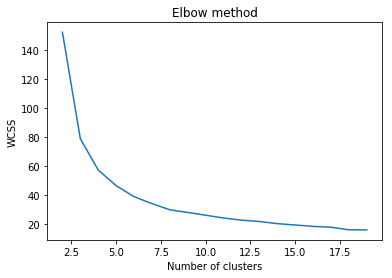

In [9]:
plt.plot(range(2,20),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method')

# Silhouette score for various number of clusters

In [10]:
print(score)

[0.6808136202936816, 0.5525919445499757, 0.4978256901095472, 0.49285559183161204, 0.36889352729397645, 0.36005979973284596, 0.35537845088992726, 0.3269483772458558, 0.3332488524433043, 0.3077445545503646, 0.31743685437916086, 0.2758462321283318, 0.2905110292983019, 0.28822407172557385, 0.2811087302034372, 0.26986696089833323, 0.30746934194739806, 0.2684356502924875]


Text(0.5, 1.0, 'Average silhouette method')

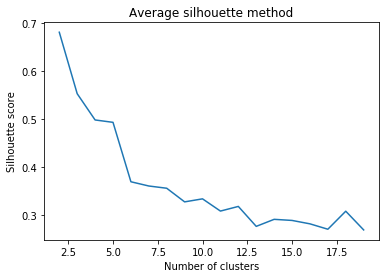

In [11]:
plt.plot(range(2,20),score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Average silhouette method')

# Since a bend is created in the Elbow method plot when the number of clusters is equal to 3 and the Silhouette score for it is also extremely high .

# Therefore , the optimum number of clusters for Iris dataset is 3.

# KMeans model (no. of clusters=3)

In [12]:
kmeans=KMeans(n_clusters=3)
label=kmeans.fit_predict(X)

In [13]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Plotting the clusters formed along with their centroids

# (Visualising the clusters - On the first two columns)

In [14]:
X["predicted_label"]=label
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predicted_label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [15]:
X_0=X.loc[X["predicted_label"]==0]
X_1=X.loc[X["predicted_label"]==1]
X_2=X.loc[X["predicted_label"]==2]

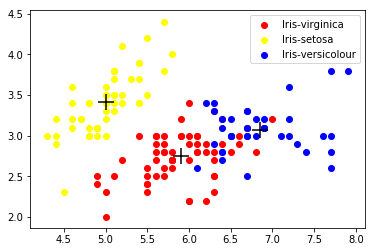

In [16]:
plt.scatter(X_0["SepalLengthCm"] ,X_0["SepalWidthCm"],c='red',label = 'Iris-virginica')
plt.scatter(X_1["SepalLengthCm"] ,X_1["SepalWidthCm"],c='yellow', label = 'Iris-setosa')
plt.scatter(X_2["SepalLengthCm"] ,X_2["SepalWidthCm"],c='blue', label = 'Iris-versicolour')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1] , c="black" , marker="+" , s=250)
plt.legend()